## Goals

The goals of the coding part of this homework assignment are to:
 * Practice the process of finding a good neural network model
 * Practice tuning hyperparameters for a model

## Module Imports
Please add code below to import numpy and any keras submodules you need.  Set a seed for random number generation from numpy before importing keras.  I've already imported pandas.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(987442)
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers

## Problem 1: Forest cover type prediction
We have a data set from with characteristics of land in national forests; our goal is to predict the type of forest on that land.  There are 7 possible forest types: Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood/Willow, Aspen, Douglas-fir, or Krummholz.  Our features are things like elevation, slope of land, distance to water, soil type, and so on.  (Original data source: https://archive.ics.uci.edu/ml/datasets/Covertype)

I didn't trust their train/validation/test split, so I have re-split the data using a random split.

In [0]:
# read in data
forest_cover = pd.read_csv("http://www.evanlray.com/data/UCIML/forest_cover/covtype.data")

# drop a couple of columns of all 0's
to_drop = [20, 28]
forest_cover.drop(forest_cover.columns[to_drop], axis = 1, inplace=True)

# extract X and y (train, validaton, and test all together)
X = forest_cover.iloc[:, 0:52].to_numpy()
y = forest_cover.iloc[:, 52].to_numpy() - 1

# perform a train/validation/test split
X_train_val, X_test, y_train_val, y_test = train_test_split(
  X, y, test_size=0.5, random_state=5435)
X_train, X_val, y_train, y_val = train_test_split(
  X_train_val, y_train_val, test_size=0.5, random_state=208963)

# normalize features
X_train_mean = np.mean(X_train, axis = 0)
X_train = X_train - X_train_mean
X_train_std = np.std(X_train, axis = 0)
X_train = X_train / X_train_std

# normalize X_val, but using X_train_mean and X_train_std to do the normalization
X_val = X_val - X_train_mean
X_val = X_val / X_train_std

# normalize X_test, but using X_train_mean and X_train_std to do the normalization
X_test = X_test - X_train_mean
X_test = X_test / X_train_std

#### Here's a starting model that we used in problem set 2.

The model takes several minutes to fit, so you don't have to rerun this code.

In [27]:
# define a multinomial logistic regression model: one layer, with a sigmoid activation and 2 inputs
multi_logistic_model = models.Sequential()
multi_logistic_model.add(layers.Dense(
    7,
    activation = 'softmax',
    input_shape = (52,)))

# compile the model using stochastic gradient descent for optimization,
# binary cross-entropy loss, and measuring performance by classification accuracy
multi_logistic_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

# Estimate the model parameters
history = multi_logistic_model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 50,
    batch_size = 512)

Train on 145252 samples, validate on 145253 samples
Epoch 1/50
145252/145252 [==============================] - 2s 12us/step - loss: 1.7926 - acc: 0.3868 - val_loss: 1.3132 - val_acc: 0.5815
Epoch 2/50
145252/145252 [==============================] - 1s 8us/step - loss: 1.1455 - acc: 0.6244 - val_loss: 1.0307 - val_acc: 0.6550
Epoch 3/50
145252/145252 [==============================] - 1s 8us/step - loss: 0.9660 - acc: 0.6731 - val_loss: 0.9138 - val_acc: 0.6834
Epoch 4/50
145252/145252 [==============================] - 1s 8us/step - loss: 0.8772 - acc: 0.6915 - val_loss: 0.8474 - val_acc: 0.6974
Epoch 5/50
145252/145252 [==============================] - 1s 8us/step - loss: 0.8243 - acc: 0.7029 - val_loss: 0.8052 - val_acc: 0.7051
Epoch 6/50
145252/145252 [==============================] - 1s 8us/step - loss: 0.7898 - acc: 0.7089 - val_loss: 0.7763 - val_acc: 0.7091
Epoch 7/50
145252/145252 [==============================] - 1s 8us/step - loss: 0.7655 - acc: 0.7108 - val_loss: 0.7558

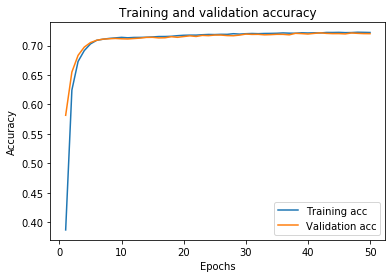

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### (a) Create a neural network model that overfits the training data.
For your convenience I have copied the code above and pasted it in below, renaming the model to "overfit_model".

In [29]:
overfit_model = models.Sequential()

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu',
    input_shape = (52,)))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    1024,
    activation = 'relu'))

overfit_model.add(layers.Dense(
    7,
    activation = 'softmax'))

# compile the model using stochastic gradient descent for optimization,
# binary cross-entropy loss, and measuring performance by classification accuracy
overfit_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

# Estimate the model parameters
history = overfit_model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 50,
    batch_size = 512)

Train on 145252 samples, validate on 145253 samples
Epoch 1/50
145252/145252 [==============================] - 10s 67us/step - loss: 0.7402 - acc: 0.6753 - val_loss: 0.5648 - val_acc: 0.7729
Epoch 2/50
145252/145252 [==============================] - 9s 59us/step - loss: 0.5090 - acc: 0.7895 - val_loss: 0.4633 - val_acc: 0.8076
Epoch 3/50
145252/145252 [==============================] - 8s 58us/step - loss: 0.4344 - acc: 0.8221 - val_loss: 0.4183 - val_acc: 0.8280
Epoch 4/50
145252/145252 [==============================] - 8s 58us/step - loss: 0.3780 - acc: 0.8460 - val_loss: 0.3787 - val_acc: 0.8480
Epoch 5/50
145252/145252 [==============================] - 9s 59us/step - loss: 0.3388 - acc: 0.8634 - val_loss: 0.3444 - val_acc: 0.8626
Epoch 6/50
145252/145252 [==============================] - 9s 59us/step - loss: 0.3080 - acc: 0.8764 - val_loss: 0.3090 - val_acc: 0.8777
Epoch 7/50
145252/145252 [==============================] - 8s 58us/step - loss: 0.2784 - acc: 0.8891 - val_loss:

In [0]:
ionosphere = pd.read_csv("http://www.evanlray.com/data/UCIML/ionosphere/ionosphere.data", header = None)

In [24]:
np.all(ionosphere.iloc[:, 1] == 0)

True

In [20]:
ionosphere.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34],
           dtype='int64')

In [36]:
# read in data
ionosphere = pd.read_csv("http://www.evanlray.com/data/UCIML/ionosphere/ionosphere.data")

# drop a couple of columns of all 0's
to_drop = [2]
ionosphere.drop(ionosphere.columns[to_drop], axis = 1, inplace=True)

# extract X and y (train, validaton, and test all together)
X = ionosphere.iloc[:, 0:-1].to_numpy()
y = pd.get_dummies(ionosphere.iloc[:, -1]).to_numpy()[:,1]

# perform a train/validation/test split
X_train_val, X_test, y_train_val, y_test = train_test_split(
  X, y, test_size=0.05, random_state=5435)
X_train, X_val, y_train, y_val = train_test_split(
  X_train_val, y_train_val, test_size=0.05, random_state=208963)

# normalize features
X_train_mean = np.mean(X_train, axis = 0)
X_train = X_train - X_train_mean
X_train_std = np.std(X_train, axis = 0)
X_train = X_train / X_train_std

# normalize X_val, but using X_train_mean and X_train_std to do the normalization
X_val = X_val - X_train_mean
X_val = X_val / X_train_std

# normalize X_test, but using X_train_mean and X_train_std to do the normalization
X_test = X_test - X_train_mean
X_test = X_test / X_train_std

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [37]:
X_train.shape

(315, 33)

In [41]:
# define a multinomial logistic regression model: one layer, with a sigmoid activation and 2 inputs
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(
    128,
    activation = 'relu',
    input_shape = (33,)))

baseline_model.add(layers.Dense(
    128,
    activation = 'relu',
    input_shape = (33,)))
baseline_model.add(layers.Dense(
    128,
    activation = 'relu',
    input_shape = (33,)))

baseline_model.add(layers.Dense(
    1,
    activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optimization,
# binary cross-entropy loss, and measuring performance by classification accuracy
baseline_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

# Estimate the model parameters
history = baseline_model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 500,
    batch_size = X_train.shape[0])

Train on 315 samples, validate on 17 samples
Epoch 1/500
315/315 [==============================] - 1s 3ms/step - loss: 0.6931 - acc: 0.3492 - val_loss: 0.6932 - val_acc: 0.4706
Epoch 2/500
315/315 [==============================] - 0s 37us/step - loss: 0.6930 - acc: 0.6508 - val_loss: 0.6932 - val_acc: 0.4706
Epoch 3/500
315/315 [==============================] - 0s 32us/step - loss: 0.6929 - acc: 0.6508 - val_loss: 0.6932 - val_acc: 0.4706
Epoch 4/500
315/315 [==============================] - 0s 43us/step - loss: 0.6928 - acc: 0.6508 - val_loss: 0.6933 - val_acc: 0.4706
Epoch 5/500
315/315 [==============================] - 0s 23us/step - loss: 0.6926 - acc: 0.6508 - val_loss: 0.6933 - val_acc: 0.4706
Epoch 6/500
315/315 [==============================] - 0s 23us/step - loss: 0.6925 - acc: 0.6508 - val_loss: 0.6933 - val_acc: 0.4706
Epoch 7/500
315/315 [==============================] - 0s 22us/step - loss: 0.6923 - acc: 0.6508 - val_loss: 0.6933 - val_acc: 0.4706
Epoch 8/500
315/31

In [34]:
ionosphere.iloc[:, -1]

0      b
1      g
2      b
3      g
4      b
      ..
345    g
346    g
347    g
348    g
349    g
Name: g, Length: 350, dtype: object

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import reuters
import matplotlib.pyplot as plt
from scipy.special import softmax
import numpy as np
import copy

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
y_test = one_hot_test_labels

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
chollet_model = models.Sequential()
chollet_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
chollet_model.add(layers.Dense(64, activation='relu'))
chollet_model.add(layers.Dense(46, activation='softmax'))

In [106]:
chollet_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = chollet_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 9s 1ms/step - loss: 2.5443 - acc: 0.5405 - val_loss: 1.6874 - val_acc: 0.6520
Epoch 2/20
7982/7982 [==============================] - 0s 56us/step - loss: 1.3742 - acc: 0.7093 - val_loss: 1.2770 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.0264 - acc: 0.7757 - val_loss: 1.1146 - val_acc: 0.7500
Epoch 4/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.8105 - acc: 0.8267 - val_loss: 1.0324 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 0s 56us/step - loss: 0.6437 - acc: 0.8613 - val_loss: 0.9676 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.5149 - acc: 0.8887 - val_loss: 0.9308 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.4186 - acc: 0.9085 - val_loss: 0.9275 - val_acc: 0.8150
Epoch 8/

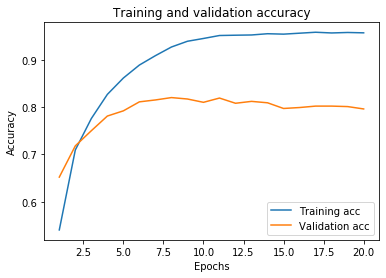

In [107]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [102]:
np.random.seed(6473)
dropout_rates = np.random.uniform(low = 0.0, high = 0.5, size = (8,))
l2_penalties_exp = np.random.uniform(low = -6, high = -1, size = (8,))
num_units = np.random.uniform(low = 46, high = 128, size = (8,)).astype(int)
l2_penalties = 10**l2_penalties_exp

val_acc = np.zeros((8,))

for (i, (dropout_rate, l2_penalty, num_unit)) in enumerate(zip(dropout_rates, l2_penalties, num_units)):
  model_dropout = models.Sequential()

  model_dropout.add(layers.Dropout(rate = dropout_rate))
  model_dropout.add(layers.Dense(num_unit, activation='relu', kernel_regularizer=regularizers.l2(l = l2_penalty), input_shape=(10000,)))
  model_dropout.add(layers.Dropout(rate = dropout_rate))
  model_dropout.add(layers.Dense(num_unit, activation='relu', kernel_regularizer=regularizers.l2(l = l2_penalty)))
  model_dropout.add(layers.Dropout(rate = dropout_rate))
  model_dropout.add(layers.Dense(46, activation='softmax'))

  model_dropout.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model_dropout.fit(partial_x_train,
                      partial_y_train,
                      epochs=100,
                      batch_size=512,
                      validation_data=(x_val, y_val))
  
  val_acc[i] = history.history['val_acc'][-1]

Train on 7982 samples, validate on 1000 samples
Epoch 1/100
7982/7982 [==============================] - 9s 1ms/step - loss: 3.3158 - acc: 0.3266 - val_loss: 2.3515 - val_acc: 0.5260
Epoch 2/100
7982/7982 [==============================] - 1s 70us/step - loss: 2.1381 - acc: 0.5114 - val_loss: 1.6845 - val_acc: 0.6050
Epoch 3/100
7982/7982 [==============================] - 1s 69us/step - loss: 1.7165 - acc: 0.5981 - val_loss: 1.4768 - val_acc: 0.6710
Epoch 4/100
7982/7982 [==============================] - 1s 70us/step - loss: 1.5072 - acc: 0.6596 - val_loss: 1.3303 - val_acc: 0.7000
Epoch 5/100
7982/7982 [==============================] - 1s 71us/step - loss: 1.3415 - acc: 0.6989 - val_loss: 1.2395 - val_acc: 0.7210
Epoch 6/100
7982/7982 [==============================] - 1s 70us/step - loss: 1.2375 - acc: 0.7214 - val_loss: 1.1771 - val_acc: 0.7560
Epoch 7/100
7982/7982 [==============================] - 1s 70us/step - loss: 1.1461 - acc: 0.7497 - val_loss: 1.1216 - val_acc: 0.7610
E

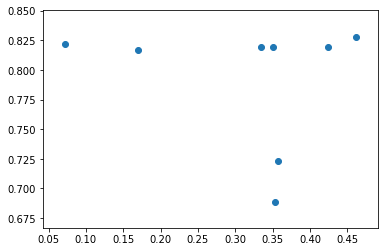

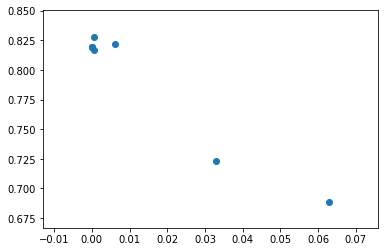

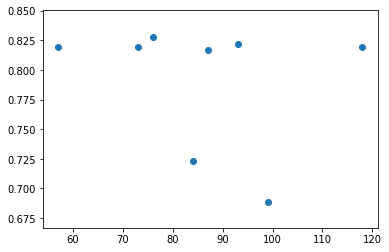

In [103]:
plt.scatter(dropout_rates[0:8], val_acc[0:8])
plt.show()
plt.scatter(l2_penalties[0:8], val_acc[0:8])
plt.show()
plt.scatter(num_units[0:8], val_acc[0:8])
plt.show()

In [110]:
dropout_rates[np.argmax(val_acc)]
dropout_rates[np.argmax(val_acc)]
l2_penalties[np.argmax(val_acc)]
l2_penalties

array([1.07921565e-04, 5.93294760e-04, 6.13314921e-03, 7.05996491e-06,
       3.29495360e-02, 6.27575153e-02, 4.50840982e-04, 1.81720181e-05])

In [111]:
final_model = models.Sequential()

final_model.add(layers.Dropout(rate = 0.35))
final_model.add(layers.Dense(80, activation='relu', input_shape=(10000,)))
final_model.add(layers.Dropout(rate = 0.35))
final_model.add(layers.Dense(80, activation='relu'))
final_model.add(layers.Dropout(rate = 0.35))
final_model.add(layers.Dense(46, activation='softmax'))

final_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = final_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/100
7982/7982 [==============================] - 9s 1ms/step - loss: 3.2783 - acc: 0.3582 - val_loss: 2.4726 - val_acc: 0.5140
Epoch 2/100
7982/7982 [==============================] - 1s 64us/step - loss: 2.1864 - acc: 0.4977 - val_loss: 1.7071 - val_acc: 0.5990
Epoch 3/100
7982/7982 [==============================] - 1s 64us/step - loss: 1.7090 - acc: 0.6050 - val_loss: 1.4593 - val_acc: 0.6710
Epoch 4/100
7982/7982 [==============================] - 1s 64us/step - loss: 1.4711 - acc: 0.6646 - val_loss: 1.3192 - val_acc: 0.7050
Epoch 5/100
7982/7982 [==============================] - 0s 61us/step - loss: 1.3203 - acc: 0.6917 - val_loss: 1.2166 - val_acc: 0.7220
Epoch 6/100
7982/7982 [==============================] - 0s 62us/step - loss: 1.1977 - acc: 0.7172 - val_loss: 1.1405 - val_acc: 0.7400
Epoch 7/100
7982/7982 [==============================] - 1s 63us/step - loss: 1.0911 - acc: 0.7392 - val_loss: 1.0815 - val_acc: 0.7610
E

In [112]:
print(chollet_model.evaluate(x_test, y_test))
print(final_model.evaluate(x_test, y_test))

2246/2246 [==============================] - 0s 113us/step
[1.2420880563112635, 0.7760463045944832]
2246/2246 [==============================] - 0s 107us/step
[1.4232519968003963, 0.8023152271234235]
